<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
source:https://stackoverflow.com/questions/32514502/neural-networks-what-does-the-input-layer-consist-of
The input layer passes the data directly to the first hidden layer where the data is multiplied by the first hidden layer's weights.
The input layer of a neural network is composed of artificial input neurons, and brings the initial data into the system for further processing by subsequent layers of artificial neurons. The input layer is the very beginning of the workflow for the artificial neural network.

### Hidden Layer:
source: https://www.i2tutorials.com/technology/hidden-layers-in-neural-networks/
The Hidden layers make the neural networks as superior to machine learning algorithms. The hidden layers are placed in between the input and output layers that’s why these are called as hidden layers. And these hidden layers are not visible to the external systems and these are private to the neural networks. There should be zero or more than zero hidden layers in the neural networks. For large majority of problems one hidden layer is sufficient.
Basically, each hidden layer contains same number of  neurons and large number of hidden layers in neural network the longer it will take for the neural network produce the output  and if any complex problems by using the hidden layers the neural networks can solve.

### Output Layer:
source: https://www.i2tutorials.com/technology/hidden-layers-in-neural-networks/
The output layer is mostly responsible for producing the final output results. There must be always an output layer in the neural networks. The output layer takes the inputs which are passed in from the layers before it, and performs the calculations through its neurons and then the output is computed.
But in any complex neural networks the output layer receives inputs from the previous hidden layers. The output is a regressor then the output layer has a single node. And it is classifier it is also having the single node and if you use a probabilistic Activation function such as SoftMax then the output layer has one node per one class label of our model.

### Neuron:
source:https://hackernoon.com/everything-you-need-to-know-about-neural-networks-8988c3ee4491
It is the basic unit of a neural network. It gets certain number of inputs and a bias value. When a signal(value) arrives, it gets multiplied by a weight value. If a neuron has 4 inputs, it has 4 weight values which can be adjusted during training time.

### Weight:
source: https://hackernoon.com/everything-you-need-to-know-about-neural-networks-8988c3ee4491
A weight represent the strength of the connection between units. If the weight from node 1 to node 2 has greater magnitude, it means that neuron 1 has greater influence over neuron 2. A weight brings down the importance of the input value. Weights near zero means changing this input will not change the output. Negative weights mean increasing this input will decrease the output. A weight decides how much influence the input will have on the output.

### Activation Function:
source: https://www.i2tutorials.com/technology/activation-functions-in-deep-learning/
Activation functions is used to mapping the complicated and non-linear functions between the input and output signals. Then the output signal is input to the next layer.without activation function we can’t do a non-linear transformations because there is no activation function the weights and biases do  linear transformation.we want to do a image classification and language translation, then the linear transformation is not suitable that’s why we are going with non-linear transformation.

### Node Map:
source:
https://www.pngfind.com/mpng/wwiiow_neural-network-3-layers-circle-hd-png-download/

### Perceptron:
source: https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464
The simplest and oldest model of Neuron, as we know it. Takes some inputs, sums them up, applies activation function and passes them to output layer. No magic here.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

A neural network is defined as a computing system that consist of a number of simple but highly interconnected elements or nodes, called ‘neurons’, which are organized in layers which process information using dynamic state responses to external inputs. This algorithm is extremely useful, as we will explain later, in finding patterns that are too complex for being manually extracted and taught to recognize to the machine. In the context of this structure, patterns are introduced to the neural network by the input layer that has one neuron for each component present in the input data and is communicated to one or more hidden layers present in the network; called ‘hidden’ only due to the fact that they do not constitute the input or output layer. It is in the hidden layers where all the processing actually happens through a system of connections characterized by weights and biases (commonly referred as W and b): the input is received, the neuron calculate a weighted sum adding also the bias and according to the result and a pre-set activation function (most common one is sigmoid, σ, even though it almost not used anymore and there are better ones like ReLu), it decides whether it should be ‘fired’ or activated. Afterwards, the neuron transmit the information downstream to other connected neurons in a process called ‘forward pass’. At the end of this process, the last hidden layer is linked to the output layer which has one neuron for each possible desired output

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [2]:
#making the correct output the x2 column :) 

correct_outputs = [[0], [0], [1], [1]]

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [4]:
#weights
weights = 2 * np.random.random((3,1)) - 1
weights

array([[ 0.45969422],
       [-0.27682307],
       [-0.72070102]])

In [6]:
#weighted sum
weighted_sum = np.dot(df, weights)
weighted_sum

array([[-0.72070102],
       [-0.2610068 ],
       [-0.99752409],
       [ 0.18287115]])

In [7]:
#activated outputs are the sigmoid multiplied by the weighted sum
activated_outputs = sigmoid(weighted_sum)
activated_outputs

array([[0.32723863],
       [0.43511623],
       [0.26942849],
       [0.5455908 ]])

In [8]:
#calculating the error
error = correct_outputs - activated_outputs
error

array([[-0.32723863],
       [-0.43511623],
       [ 0.73057151],
       [ 0.4544092 ]])

In [9]:
#making adjustments
adjustments = error * sigmoid_derivative(weighted_sum)
adjustments

array([[-0.07204273],
       [-0.10694726],
       [ 0.14380334],
       [ 0.1126578 ]])

In [10]:
weights += np.dot(df.T, adjustments)
weights

array([[ 0.46540476],
       [-0.02036193],
       [-0.75588767]])

In [12]:
#implementing code from our lecture 

for iteration in range(10000):
    
    #Weighted sum of inputs / weights
    weighted_sum = np.dot(df, weights)
    
    #Activate!
    activated_output = sigmoid(weighted_sum)
    
    #Calc error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    #Update the Weights
    weights += np.dot(df.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-1.39121265]
 [ 8.99142994]
 [-4.40845107]]
Output after training
[[0.0120282 ]
 [0.00301961]
 [0.98987858]
 [0.99949986]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [13]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#looking at the type of data in the dataframe and the shape of it
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
diabetes.shape

(768, 9)

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [16]:
#I think I'll use MinMax for this
from sklearn.preprocessing import MinMaxScaler, Normalizer

y = diabetes.Outcome.values
X = diabetes.drop('Outcome', axis='columns').values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(X)
print(y.shape)
print(y)

(768, 8)
[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]
(768,)
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 

In [17]:
class Perceptron:
    
    def __init__ (self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, X):
        return None
    
    def __sigmoid_derivative(self, X):
        return None
    
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications
        
        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)   

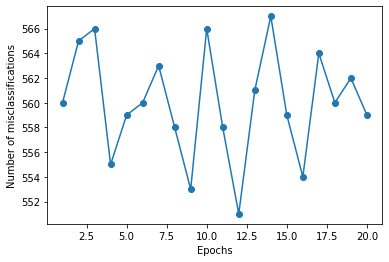

In [19]:
#visualizing 20! 
pn = Perceptron(0.01, 20)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?